# Instalar Librerias

In [ ]:
import numpy as np
from IPython.display import display, Latex
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from scipy import signal
#from scipy import fftpack
from importlib import reload
#from scipy import stats

#PARA LAS SEÑALES DE MATLAB
import scipy.io as sio

import csv

import pandas as pd

from sklearn.model_selection import train_test_split

import re

# Montar drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Ejercicio 2:
Implementar un clasificador de texto utilizando el clasificador ingenuo de Bayes. Utilizar
el conjunto de datos ”Noticias Argentinas” para clasificar cada noticia seg´un su tipo.

##Código

###Obtención de Datos:

In [ ]:
path2 = "/content/drive/Shareddrives/Machine Learning/TP1/Noticias_argentinas.xlsx"
data2 = pd.read_excel(path2)
#eliminamos info no importante
data2 = data2.loc[:,'titular':'categoria']
#elegimos las categorias: Entretenimiento, Internacional, Salud, Deportes y eliminamos el resto
head2 = ['Entretenimiento', 'Internacional', 'Salud', 'Deportes']
data2 = data2.loc[data2['categoria'].isin(head2)]

data2

,titular,fuente,categoria
20,Superclásico: River sacó a la venta más entrad...,Diario ElSol.com.ar Mendoza,Deportes
21,"Paulo Gazzaniga, el arquero sorpresa de Lionel...",Clarín.com,Deportes
22,"Maradona negó haber criticado a Messi, disparó...",Ambito.com,Deportes
23,La causa de la primera tarjeta verde,Olé,Deportes
24,Ponzio y Scocco trabajan pensando en la revancha,Nuevo Diario de Santiago del Estero,Deportes
...,...,...,...
30811,Científicos descubren cómo detectar cáncer en ...,teleSUR TV,Salud
30812,Bombero de Florida dona riñón para ayudar a de...,Hoy Los Angeles,Salud
30813,América busca afianzar medidas para mantener a...,IntraMed,Salud
30814,Descubren por qué algunos bebés se recuperan a...,Rosario3.com,Salud


In [ ]:
#separamos en grupo de entrenamiento y testeo 
size_test= 0.3
test,train = train_test_split(data2, train_size = size_test, random_state = 0)
test

,titular,fuente,categoria
6213,Atentos con las dietas de verano: Mentirosas y...,AIM Digital,Salud
8615,Ãšltimo 'finde' para vacunar a los más pequeñ...,La Voz del Interior,Salud
9726,Las vacunas evitan la muerte de 3 millones de ...,Misiones Cuatro,Salud
11885,El mensaje de Marcelo Tinelli minutos antes de...,Clarín.com,Deportes
2227,"¿El ""Bailando"" o las vacaciones? Jimena Barón ...",Infobae.com,Entretenimiento
...,...,...,...
26269,Hits y banderas de un Monumental caliente,Olé,Deportes
6534,Comienzan Jornadas de Hepatología y para el en...,El Retrato de Hoy,Salud
19715,#SuperFinalLibertadores: Se dispararon las con...,Misiones OnLine,Deportes
21628,Leonardo Ponzio no tendrá problemas para viaja...,TN,Deportes


###Cálculo de probabilidades

In [ ]:
#P(categoria)
E = train.loc[train['categoria'] == 'Entretenimiento','categoria'].count()/len(train)
I = train.loc[train['categoria'] == 'Internacional','categoria'].count()/len(train)
S = train.loc[train['categoria'] == 'Salud','categoria'].count()/len(train)
D = train.loc[train['categoria'] == 'Deportes','categoria'].count()/len(train)

prob_categoria = [E,I,S,D]

In [ ]:
train

,titular,fuente,categoria
14567,Policía desarticuló red en la que operaba el '...,Caracol Radio,Internacional
15549,Tadic clasificó al Ajax a octavos tras más de ...,ESPN,Deportes
26298,La nota que encontró Sol Pérez en su auto cuan...,Cienradios,Entretenimiento
28661,"Eduardo Coudet: 'No miramos la tabla, miramos ...",TyC Sports,Deportes
17071,"River-Gimnasia, por la Copa Argentina: horario...",Clarín.com,Deportes
...,...,...,...
2948,Cristian U se defendió tras la denuncia públic...,Ciudad Magazine,Entretenimiento
16909,River y Gimnasia buscan un lugar en la final,MDZ Online,Deportes
30731,Se confirmaron dos casos positivos de hantavirus,Télam,Salud
19737,"Tras la salida de'Cabito', Matías Martin dijo...",Clarín.com,Entretenimiento


###Creación del diccionario

In [ ]:
#creamos el diccionario que tiene como key las palabras y como value un vector de 4 valores
#en cada posicion del vector tenemos la frecuencia de aparicion de cada key para cada categoria(E,I,S,D)
#palabra -> [E,I,S,D]
#diccionario con palabra -> P(palabra|categoria)
dic = dict()
palabras_cat = np.array([0,0,0,0])
for i in train.index:
  #obtengo el titulo y lo paso a minuscula
  titulo = train.loc[i,'titular'].lower()
  #remplazo los caracteres por espacios y separo el titulo de la noticia por espacios obteniendo un vector con las palabras
  palabras_titulo = re.sub(r'[,.;:¡!¿?\"\'\(\)\[\]|\\]', ' ', titulo).split()

  for j in range(0,len(palabras_titulo)):
    #si no esta la palabra en el diccionario la agregamos con values 0
    if palabras_titulo[j] not in dic.keys():
      dic[palabras_titulo[j]] = np.array([0,0,0,0])

    #nos fijamos la categoria de la palabra que estamos y sumamos en value
    cat = train.loc[i,'categoria'] 
    if cat == 'Entretenimiento':
      dic[palabras_titulo[j]][0] += 1
      palabras_cat[0] += 1
    elif cat == 'Internacional':
      dic[palabras_titulo[j]][1] += 1
      palabras_cat[1] += 1
    elif cat == 'Salud':
      dic[palabras_titulo[j]][2] += 1
      palabras_cat[2] += 1
    else:
      dic[palabras_titulo[j]][3] += 1
      palabras_cat[3] += 1

**Corrección de Laplace**

In [ ]:
#hacemos la correccion de Lapalace para evitar que no se anule la probabilidad final
k = 4
matriz = []
for palabra in dic.keys():
  aux = (dic[palabra]+1)/(palabras_cat+k)
  matriz.append(aux)


pal_cat = pd.DataFrame(matriz, columns =head2, index = dic.keys())
pal_cat #P(palabra|categoria)

,Entretenimiento,Internacional,Salud,Deportes
policía,0.000263,0.000885,0.000032,0.000670
desarticuló,0.000026,0.000083,0.000032,0.000029
red,0.000132,0.000138,0.000032,0.000029
en,0.024333,0.032079,0.028484,0.031244
la,0.038985,0.039905,0.046171,0.067496
...,...,...,...,...
sería,0.000026,0.000055,0.000032,0.000029
inútil,0.000026,0.000055,0.000032,0.000029
afimaron,0.000026,0.000055,0.000032,0.000029
youtuber,0.000026,0.000055,0.000032,0.000029


**Cálculo de probabilidades para curva ROC**

In [ ]:
#P(palabra) para la curva ROC
pal = []
for i in range(0,len(pal_cat)):
  aux = 0
  for j in range(0,k):
    aux += pal_cat.iloc[i,j]*prob_categoria[j]
  pal.append(aux)

prob_palabras = pd.DataFrame(pal, index = dic.keys())

prob_palabras

,0
policía,0.000462
desarticuló,0.000043
red,0.000083
en,0.029030
la,0.048145
...,...
sería,0.000036
inútil,0.000036
afimaron,0.000036
youtuber,0.000036


###Resolución

$P(categoria1|x) = \frac{P(x|categoria1) * P(categoria1)}{P(x)}$

$P(x|categoria1) = P(z1|categoria) * P(z2|categoria) .....$

$P(x) = P(z1|categoria1)  P(z2|categoria1) .... P(categoria1) + P(z1|categoria2)  P(z2|categoria2) .... P(categoria2) $

In [ ]:
clasif_proba_clase_ROC = pd.DataFrame(index = test.loc[:,'titular'],columns = head2)


In [ ]:
#P(palabra|categoria) en pal_cat DataFrame
#P(categoria) en prob_categoria lista
#P(palabra) en prob_palabras DataFrame 
#Grupo testeo en test DataFrame
#Numero de categorias en k

#probabilidades de clase para curva ROC
clasif_proba_clase_ROC = pd.DataFrame(index = test.loc[:,'titular'], columns=['Observada', 'Real'])


#index de matriz de confusion
index_real = []
index_predicho = []

for i in test.index:
  #index_real
  cate = test.loc[i,'categoria']
  if cate == 'Entretenimiento':
    index_real.append(0)
    Val_cat_real = 0
  elif cate == 'Internacional':
    index_real.append(1)
    Val_cat_real = 1
  elif cate == 'Salud':
    index_real.append(2)
    Val_cat_real = 2
  else:
    index_real.append(3)
    Val_cat_real = 3
  
  #index_predicho
  #obtengo el titulo y lo paso a minuscula
  titulo_test = test.loc[i,'titular'].lower()
  #remplazo los caracteres por espacios y separo el titulo de la noticia por espacios obteniendo un vector con las palabras
  titular = re.sub(r'[,.;:¡!¿?\"\'\(\)\[\]|\\]', ' ', titulo_test).split()

  titulo = test.loc[i,'titular']

  titular_cat = []
  cat_titular_sinx = []
  for i in range(0,k):#recorro las 4 categorias
    titular_catx = 1
    for pal in titular:#recorro cada palabra en el vector titular
      if pal in dic.keys():#me fijo si la palabra esta en el diccionario original
        titular_catx *= pal_cat.loc[pal,head2[i]] 
      else:
        titular_catx /= (palabras_cat[i]+k)
    titular_cat.append(titular_catx)
    cat_titular_sinx.append(titular_catx*prob_categoria[i])
    #clasif_proba_clase_ROC.loc[titulo,i] = titular_catx

  cat_max = cat_titular_sinx.index(max(cat_titular_sinx))
  index_predicho.append(cat_max)


  #curva roc
  prob_x = sum(cat_titular_sinx)
  cat_titular = []
  for i in range(0,k):
    cat_titular.append(cat_titular_sinx[i]/prob_x)
    clasif_proba_clase_ROC.loc[titulo,i] = cat_titular_sinx[i]/prob_x
  clasif_proba_clase_ROC.loc[titulo,'Observada'] = cat_max #guardamos la clasificación inferida
  clasif_proba_clase_ROC.loc[titulo,'Real'] =  Val_cat_real #guardamos la clasificación real


tabla_index = pd.DataFrame()
tabla_index['titular'] = test.loc[:,'titular']
tabla_index['index real'] = index_real
tabla_index['index predicho'] = index_predicho



tabla_index

,titular,index real,index predicho
6213,Atentos con las dietas de verano: Mentirosas y...,2,2
8615,Ãšltimo 'finde' para vacunar a los más pequeñ...,2,2
9726,Las vacunas evitan la muerte de 3 millones de ...,2,2
11885,El mensaje de Marcelo Tinelli minutos antes de...,3,3
2227,"¿El ""Bailando"" o las vacaciones? Jimena Barón ...",0,0
...,...,...,...
26269,Hits y banderas de un Monumental caliente,3,3
6534,Comienzan Jornadas de Hepatología y para el en...,2,2
19715,#SuperFinalLibertadores: Se dispararon las con...,3,3
21628,Leonardo Ponzio no tendrá problemas para viaja...,3,3


In [ ]:
clasif_proba_clase_ROC

,Observada,Real,0,1,2,3
titular,,,,,,
Atentos con las dietas de verano: Mentirosas y peligrosas,2,2,1.124316e-02,2.914850e-03,9.824826e-01,3.359407e-03
Ãšltimo 'finde' para vacunar a los más pequeños contra el sarampión y la rubéola en Córdoba,2,2,3.838148e-12,2.130299e-12,1.000000e+00,4.808467e-12
Las vacunas evitan la muerte de 3 millones de personas al año',2,2,1.455899e-08,4.676686e-07,9.999995e-01,2.359864e-09
El mensaje de Marcelo Tinelli minutos antes de la postergación de la Superfinal entre River y Boca,3,3,5.488324e-08,5.821098e-16,1.996089e-14,9.999999e-01
"¿El ""Bailando"" o las vacaciones? Jimena Barón empezó a palpitar el final del año con un singular mensaje",0,0,9.999988e-01,3.184552e-10,9.738515e-10,1.151854e-06
...,...,...,...,...,...,...
Hits y banderas de un Monumental caliente,3,3,5.848196e-04,2.076986e-04,6.218138e-05,9.991453e-01
Comienzan Jornadas de Hepatología y para el encuentro nacional del Club de Páncreas,2,2,2.915985e-04,6.990369e-04,9.977231e-01,1.286217e-03
#SuperFinalLibertadores: Se dispararon las consultas por pasajes a Madrid,3,3,1.928020e-05,7.563115e-04,1.131647e-04,9.991112e-01


###Creación matriz de confusión

In [ ]:
#creamos matriz de confusion predichos en columnas y reales en filas
matriz_confusion = pd.DataFrame(columns = head2,index = head2)
matriz_confusion = matriz_confusion.fillna(0)

for i in range(0,len(tabla_index)):
  matriz_confusion.iloc[tabla_index.iloc[i,1],tabla_index.iloc[i,2]] += 1

matriz_confusion

,Entretenimiento,Internacional,Salud,Deportes
Entretenimiento,1087,36,18,10
Internacional,16,1109,26,14
Salud,1,8,1134,0
Deportes,12,9,2,1136


In [ ]:
print(head2)

['Entretenimiento', 'Internacional', 'Salud', 'Deportes']


In [ ]:
#contamos VP,VN,FP,FN
head2_ = head2.copy()
head2_.append('Total')
tabla_VF = pd.DataFrame(columns = ['VP','VN','FP','FN'], index = head2_)
tabla_VF = tabla_VF.fillna(0)

for i in range(0,k):#filas
  for j in range(0,k):#columnas
    if i == j:
      tabla_VF.iloc[i,0] += matriz_confusion.iloc[i,j]
    else:
      tabla_VF.iloc[i,3] += matriz_confusion.iloc[i,j]
      tabla_VF.iloc[j,2] += matriz_confusion.iloc[i,j]

for i in range(0,k):
  tabla_VF.iloc[i,1] = matriz_confusion.sum().sum()-tabla_VF.sum(axis=1)[i]

for i in range(0,k):
  tabla_VF.iloc[4,i] = tabla_VF.sum()[i]
tabla_VF
    
tabla_VF

,VP,VN,FP,FN
Entretenimiento,1087,3438,29,64
Internacional,1109,3400,53,56
Salud,1134,3429,46,9
Deportes,1136,3435,24,23
Total,4466,13702,152,152


### Cálculo de Metricas:

* $Accuracy  = \frac{VP + VN}{VP+VN+FP+FN}$

* $Precision  = \frac{VP}{VP+FP}$

* $Recall = Tasa \, de \, VP = \frac{VP}{VP+FN}$

* $F1-Score  = \frac{2\cdot Precisión \cdot Recall}{Precisión + Recall}$

* $Tasa \, de \, VP  = \frac{VP}{VP+VN}$

* $Tasa \, de \, FP  = \frac{FP}{FP+VN}$


In [ ]:
head_metricas = ['Accuracy','Precision','Recall','F1-Score','Tasa de FP']
metricas = pd.DataFrame(columns= head_metricas, index=head2_)
metricas = metricas.fillna(0)

metricas

for i in metricas.index:
  #Accuracy
  metricas.loc[i,'Accuracy'] = (tabla_VF.loc[i,'VP'] + tabla_VF.loc[i,'VN'])/(tabla_VF.loc[i,'VP']+tabla_VF.loc[i,'VN']+tabla_VF.loc[i,'FP']+tabla_VF.loc[i,'FN'])
  #Precision
  metricas.loc[i,'Precision'] = tabla_VF.loc[i,'VP']/(tabla_VF.loc[i,'VP']+tabla_VF.loc[i,'FP'])
  #Recall
  metricas.loc[i,'Recall'] = tabla_VF.loc[i,'VP']/(tabla_VF.loc[i,'VP']+tabla_VF.loc[i,'FN'])
  #F1-Score
  metricas.loc[i,'F1-Score'] = (2*metricas.loc[i,'Precision']*metricas.loc[i,'Recall'])/(metricas.loc[i,'Precision']+metricas.loc[i,'Recall'])
  #Tasa de FP
  metricas.loc[i,'Tasa de FP'] = tabla_VF.loc[i,'FP']/(tabla_VF.loc[i,'FP']+tabla_VF.loc[i,'VN'])
metricas

,Accuracy,Precision,Recall,F1-Score,Tasa de FP
Entretenimiento,0.979861,0.974014,0.944396,0.958977,0.008365
Internacional,0.976397,0.954389,0.951931,0.953159,0.015349
Salud,0.988090,0.961017,0.992126,0.976324,0.013237
Deportes,0.989822,0.979310,0.980155,0.979733,0.006938
Total,0.983543,0.967085,0.967085,0.967085,0.010972


###Curva ROC

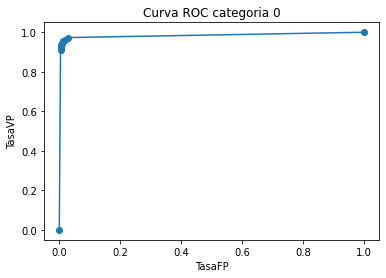

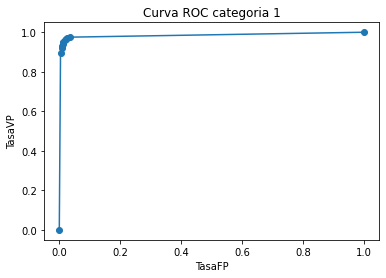

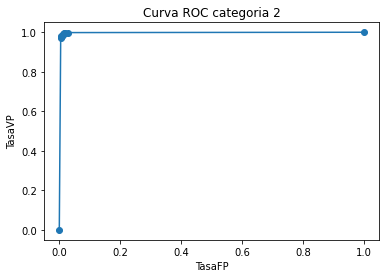

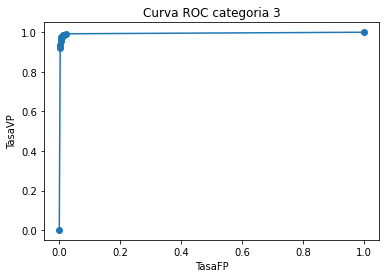

In [ ]:
#curva ROC

#calcular por categoría

#tabla_index contiene los index reales y los predichos
#clasif_proba_clase_ROC contiene las probabilidades P(categoria1|x)

paso = 0.1
u = np.arange(0,1+paso,paso) #creación de umbrales
 

for i in range(0,k):#para cada categoría

  #matriz donde vamos a guardar las coordenadas de los puntos ROC
  ROC= np.zeros([2,11])

  VPR = clasif_proba_clase_ROC.loc[clasif_proba_clase_ROC['Real'] == i].copy()
  FPR = clasif_proba_clase_ROC.loc[clasif_proba_clase_ROC['Real'] != i].copy()

  for j in u: #me fijo en todos los umbrales
    VPR_d = VPR.copy() 
    FPR_d = FPR.copy()   
    VPR_d.loc[VPR[i] >= j, i] = 'VP' #supera umbral
    VPR_d.loc[VPR[i] < j, i] = 'FN' #no supera umbral
    FPR_d.loc[FPR[i] >= j, i] = 'FP' #supera umbral pero no era la categoría correcta
    FPR_d.loc[FPR[i] < j, i] = 'VN' #no supera umbral y era la categoría correcta

    #contamos el total de 'VP', 'FN', 'FP' y 'VN' y los guardamos
    val_ROC = pd.DataFrame(VPR_d[i].value_counts().append(FPR_d[i].value_counts()),index=['VP','FP','VN','FN'])
    val_ROC = val_ROC.fillna(0)

    #con eso calculamos las tasas de verdaderos positivos y falsos positivos y guardamos el punto ROC
    ROC[0,int(10*j)]=val_ROC.loc['FP',i]/(val_ROC.loc['FP',i]+val_ROC.loc['VN',i]) 
    ROC[1,int(10*j)]=val_ROC.loc['VP',i]/(val_ROC.loc['VP',i]+val_ROC.loc['FN',i])



  plt.figure()
  plt.scatter(ROC[0,:],ROC[1,:])
  plt.plot(ROC[0,:],ROC[1,:])
  plt.title('Curva ROC categoria ' + str(i))
  plt.xlabel('TasaFP')
  plt.ylabel('TasaVP')
  plt.show()


## Resultados

Inicialmente se eligieron las categorias a analizar: Entretenimiento, Internacional, Salud, Deportes y se elimino toda la información que no es importante que venía en los datos. 


In [ ]:
data2

,titular,fuente,categoria
20,Superclásico: River sacó a la venta más entrad...,Diario ElSol.com.ar Mendoza,Deportes
21,"Paulo Gazzaniga, el arquero sorpresa de Lionel...",Clarín.com,Deportes
22,"Maradona negó haber criticado a Messi, disparó...",Ambito.com,Deportes
23,La causa de la primera tarjeta verde,Olé,Deportes
24,Ponzio y Scocco trabajan pensando en la revancha,Nuevo Diario de Santiago del Estero,Deportes
...,...,...,...
30811,Científicos descubren cómo detectar cáncer en ...,teleSUR TV,Salud
30812,Bombero de Florida dona riñón para ayudar a de...,Hoy Los Angeles,Salud
30813,América busca afianzar medidas para mantener a...,IntraMed,Salud
30814,Descubren por qué algunos bebés se recuperan a...,Rosario3.com,Salud


Separamos en conjunto de entrenamiento y de testeo

In [ ]:
print('Conjunto de entrenamiento:')
print(train)
print('Conjunto de testeo:')
print(test)

Conjunto de entrenamiento:
                                                 titular  ...        categoria
14567  Policía desarticuló red en la que operaba el '...  ...    Internacional
15549  Tadic clasificó al Ajax a octavos tras más de ...  ...         Deportes
26298  La nota que encontró Sol Pérez en su auto cuan...  ...  Entretenimiento
28661  Eduardo Coudet: 'No miramos la tabla, miramos ...  ...         Deportes
17071  River-Gimnasia, por la Copa Argentina: horario...  ...         Deportes
...                                                  ...  ...              ...
2948   Cristian U se defendió tras la denuncia públic...  ...  Entretenimiento
16909       River y Gimnasia buscan un lugar en la final  ...         Deportes
30731   Se confirmaron dos casos positivos de hantavirus  ...            Salud
19737  Tras la salida de'Cabito', Matías Martin dijo...  ...  Entretenimiento
22479  Mauricio Macri podría reunirse mañana con el p...  ...    Internacional

[10777 rows x 3 columns]

Primero calculamos:

$P(palabra|categoria) = \frac{cant  \, de \, esa  \,palabra \, por \, categoria}{cant \, total \, de  \,palabras \, en \, esa  \,categoria} $ 


EJ:
$P("hola"|E) = \frac{cant \, de \, "hola" \, en \, E}{total \, palabras \, en \, E}$

Segundo calculamos


$P(categoria) = \frac{cant de noticias en esa categoria}{total de noticias}$


Nosotros buscamos dada una noticia x con palabras z (PARA ROC)

$P(categoria|x) = \frac{P(x|categoria) * P(categoria)}{P(x)}$ 

En si buscamos

$MAX(P(x|categoria) * P(categoria))$

tal que:

$P(x|categoria) = P(z1|categoria) * P(z2|categoria) .....$

Calculamos para ROC
$P(palabra) = P(palabra|categoria1) * P(categoria1)+.....$

Siempre teniendo en cuenta la corrección de Laplace para eliminar todas las probabilidades que son igual a cero:

$p = \frac{cantidad \, de \, ocurrencias + 1}{total + k}$

Las probabilidades del título, las calculamos calculando las probabilidades de cada una de las palabras que aparecen en el título. 

A partir de las palabras que aparecen en los titulares, creamos el diccionario

In [ ]:
pal_cat

,Entretenimiento,Internacional,Salud,Deportes
policía,0.000263,0.000885,0.000032,0.000670
desarticuló,0.000026,0.000083,0.000032,0.000029
red,0.000132,0.000138,0.000032,0.000029
en,0.024333,0.032079,0.028484,0.031244
la,0.038985,0.039905,0.046171,0.067496
...,...,...,...,...
sería,0.000026,0.000055,0.000032,0.000029
inútil,0.000026,0.000055,0.000032,0.000029
afimaron,0.000026,0.000055,0.000032,0.000029
youtuber,0.000026,0.000055,0.000032,0.000029


Calculamos las clases a partir del algoritmo con el conjunto de validación. Con esto, creamos la matriz de confusión:

In [ ]:
matriz_confusion

,Entretenimiento,Internacional,Salud,Deportes
Entretenimiento,1087,36,18,10
Internacional,16,1109,26,14
Salud,1,8,1134,0
Deportes,12,9,2,1136


A partir de la matriz de confusión, calculamos los VP, VN, FP y FN para cada categoría y totales.

In [ ]:
tabla_VF

,VP,VN,FP,FN
Entretenimiento,1087,3438,29,64
Internacional,1109,3400,53,56
Salud,1134,3429,46,9
Deportes,1136,3435,24,23
Total,4466,13702,152,152


A partir de la tabla, calculamos las distintas métricas:


* $Accuracy  = \frac{VP + VN}{VP+VN+FP+FN}$

* $Precision  = \frac{VP}{VP+FP}$

* $Recall = Tasa \, de \, VP = \frac{VP}{VP+FN}$

* $F1-Score  = \frac{2\cdot Precisión \cdot Recall}{Precisión + Recall}$

* $Tasa \, de \, FP  = \frac{FP}{FP+VN}$

Obteninendo asi:

In [ ]:
metricas

,Accuracy,Precision,Recall,F1-Score,Tasa de FP
Entretenimiento,0.979861,0.974014,0.944396,0.958977,0.008365
Internacional,0.976397,0.954389,0.951931,0.953159,0.015349
Salud,0.988090,0.961017,0.992126,0.976324,0.013237
Deportes,0.989822,0.979310,0.980155,0.979733,0.006938
Total,0.983543,0.967085,0.967085,0.967085,0.010972


Calculamos las curvas ROC para cada una de las categorías:

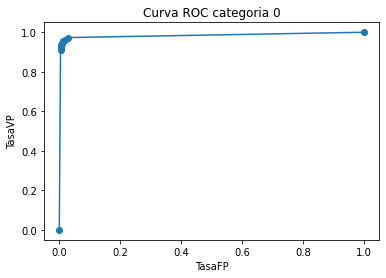

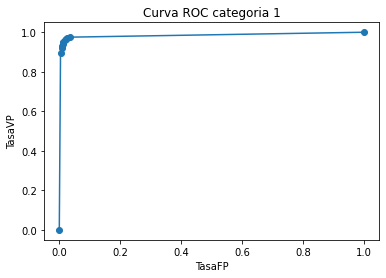

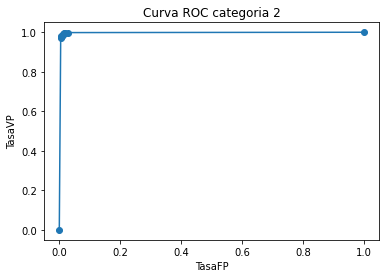

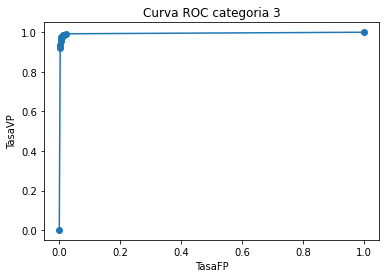

In [ ]:
paso = 0.1
u = np.arange(0,1+paso,paso) #creación de umbrales
 

for i in range(0,k):#para cada categoría

  #matriz donde vamos a guardar las coordenadas de los puntos ROC
  ROC= np.zeros([2,11])

  VPR = clasif_proba_clase_ROC.loc[clasif_proba_clase_ROC['Real'] == i].copy()
  FPR = clasif_proba_clase_ROC.loc[clasif_proba_clase_ROC['Real'] != i].copy()

  for j in u: #me fijo en todos los umbrales
    VPR_d = VPR.copy() 
    FPR_d = FPR.copy()   
    VPR_d.loc[VPR[i] >= j, i] = 'VP' #supera umbral
    VPR_d.loc[VPR[i] < j, i] = 'FN' #no supera umbral
    FPR_d.loc[FPR[i] >= j, i] = 'FP' #supera umbral pero no era la categoría correcta
    FPR_d.loc[FPR[i] < j, i] = 'VN' #no supera umbral y era la categoría correcta

    #contamos el total de 'VP', 'FN', 'FP' y 'VN' y los guardamos
    val_ROC = pd.DataFrame(VPR_d[i].value_counts().append(FPR_d[i].value_counts()),index=['VP','FP','VN','FN'])
    val_ROC = val_ROC.fillna(0)

    #con eso calculamos las tasas de verdaderos positivos y falsos positivos y guardamos el punto ROC
    ROC[0,int(10*j)]=val_ROC.loc['FP',i]/(val_ROC.loc['FP',i]+val_ROC.loc['VN',i]) 
    ROC[1,int(10*j)]=val_ROC.loc['VP',i]/(val_ROC.loc['VP',i]+val_ROC.loc['FN',i])



  plt.figure()
  plt.scatter(ROC[0,:],ROC[1,:])
  plt.plot(ROC[0,:],ROC[1,:])
  plt.title('Curva ROC categoria ' + str(i))
  plt.xlabel('TasaFP')
  plt.ylabel('TasaVP')
  plt.show()